In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["svg.fonttype"] = "none"


In [ ]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# mpl.rc('text', usetex = True)
# mpl.rc('font', family = 'serif')

# import numpy as np

### PT1 + PT2 Buffo Method Comparison

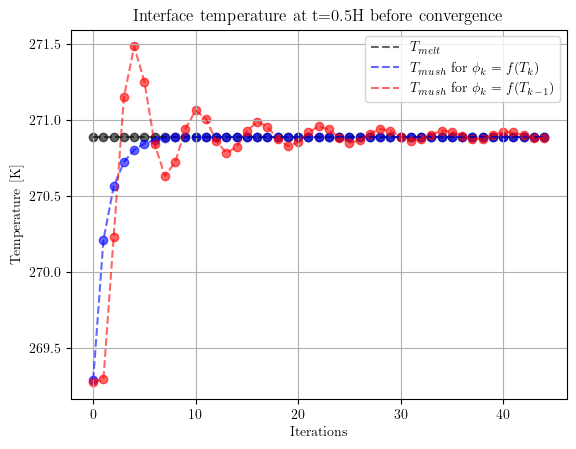

In [6]:

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

import numpy as np


tempmushPT1_0p01_1000iter_voller1 = np.load(
    r"C:\Users\sneha\Documents\MBDHiWi\MBDHiwi\spyicedir\spyicedir\outputs\2024-09-27\093344_real_47.0_1000_0.01_buffo_pt1\temperature_mushy.npy",
    allow_pickle=True,
)
tempmushPT2_0p01_1000iter_voller1 = np.load(
    r"C:\Users\sneha\Documents\MBDHiWi\MBDHiwi\spyicedir\spyicedir\outputs\2024-09-27\094942_real_47.0_1000_0.01_buffo_pt2\temperature_mushy.npy",
    allow_pickle=True,
)

iter_arr = np.arange(0, len(tempmushPT2_0p01_1000iter_voller1[1]), 1)
tempmushPT1_0p01_1000iter_voller1_arr = np.array(tempmushPT1_0p01_1000iter_voller1[1])[
    :, 1
]
tempmushPT2_0p01_1000iter_voller1_arr = np.array(tempmushPT2_0p01_1000iter_voller1[1])[
    :, 1
]
step_arr = (
    np.ones(len(tempmushPT2_0p01_1000iter_voller1_arr))
    * tempmushPT1_0p01_1000iter_voller1_arr[-1]
)
pt1_array_length = len(tempmushPT1_0p01_1000iter_voller1_arr)
tempmushPT1_0p01_1000iter_voller1_arr = np.append(
    tempmushPT1_0p01_1000iter_voller1_arr, step_arr[pt1_array_length:]
)


plt.plot(step_arr, "--", label=r"$T_{melt}$", color="black", alpha=0.6)
plt.scatter(iter_arr, step_arr, color="black", alpha=0.6)
plt.plot(
    tempmushPT1_0p01_1000iter_voller1_arr,
    "--",
    label=r"$T_{mush}$ for $\phi_k = f(T_{k})$",
    color="blue",
    alpha=0.6,
)
plt.scatter(iter_arr, tempmushPT1_0p01_1000iter_voller1_arr, color="blue", alpha=0.6)
plt.plot(
    tempmushPT2_0p01_1000iter_voller1_arr,
    "--",
    label=r"$T_{mush}$ for $\phi_k = f(T_{k-1})$",
    color="red",
    alpha=0.6,
)
plt.scatter(iter_arr, tempmushPT2_0p01_1000iter_voller1_arr, color="red", alpha=0.6)
plt.xlabel(r"Iterations")
plt.ylabel(r"Temperature [K]")
plt.title(r"Interface temperature at t=0.5H before convergence")
plt.legend()
plt.grid(True)
plt.savefig("Buffo_interfacetrack_response_dz0p01_time0p5h_nb.pdf", backend="pgf")
plt.show()


### PT2 Voller Method for different under-relaxation parameters

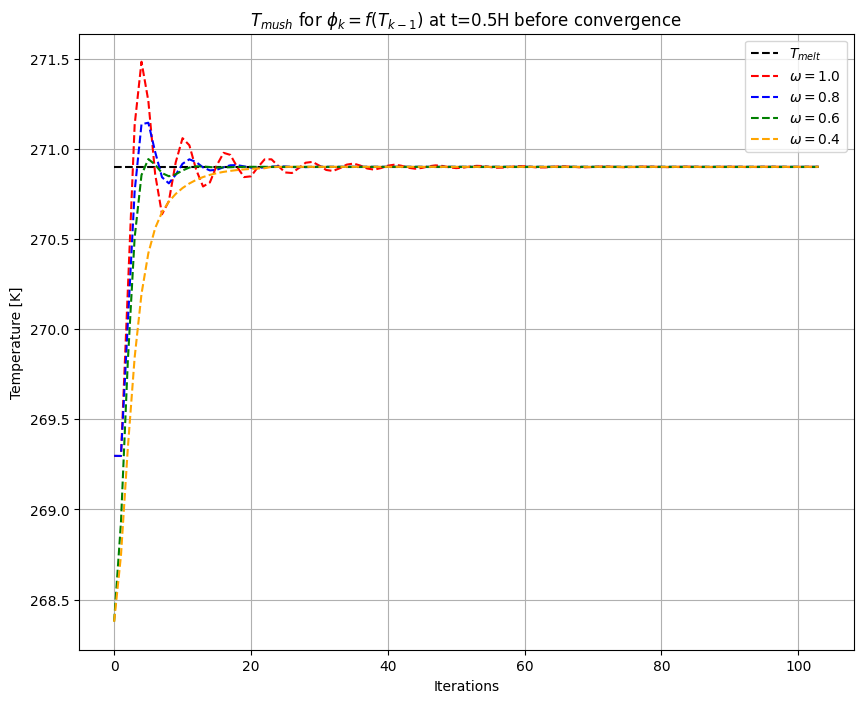

In [3]:
t_voller_1p0 = np.load(
    "outputs/2024-09-27/124638_real_47.0_1000_0.01_voller1_pt2/temperature_mushy.npy",
    allow_pickle=True,
)[1]
t_voller_0p6 = np.load(
    "outputs/2024-09-27/131506_real_47.0_1000_0.01_voller0p6_pt2/temperature_mushy.npy",
    allow_pickle=True,
)[1]
t_voller_0p4 = np.load(
    "outputs/2024-09-27/132047_real_47.0_1000_0.01_voller0p4_pt2/temperature_mushy.npy",
    allow_pickle=True,
)[1]
t_voller_0p8 = np.load(
    "outputs/2024-09-27/132248_real_47.0_1000_0.01_voller0p8_pt2/temperature_mushy.npy",
    allow_pickle=True,
)[1]

iter_arr = np.arange(0, len(t_voller_1p0), 1)
t_voller_1p0_arr = np.array(t_voller_1p0)[:, 1]
t_voller_0p8_arr = np.array(t_voller_0p8)[:, 1]
t_voller_0p6_arr = np.array(t_voller_0p6)[:, 1]
t_voller_0p4_arr = np.array(t_voller_0p4)[:, 1]
max_array_length = len(t_voller_1p0_arr)
step_arr = np.ones(max_array_length) * t_voller_1p0_arr[-1]
t_voller_0p8_arr = np.append(t_voller_0p8_arr, step_arr[len(t_voller_0p8_arr) :])
t_voller_0p6_arr = np.append(t_voller_0p6_arr, step_arr[len(t_voller_0p6_arr) :])
t_voller_0p4_arr = np.append(t_voller_0p4_arr, step_arr[len(t_voller_0p4_arr) :])

plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(step_arr, "--", label=r"$T_{melt}$", color="black")
# plt.scatter(iter_arr, step_arr, color="black", alpha=0.6)
plt.plot(
    t_voller_1p0_arr,
    "--",
    label=r"$\omega = 1.0 $",
    color="red",
)
# plt.scatter(
#     iter_arr,
#     t_voller_1p0_arr,
#     color="red",
#     alpha=0.6,
# )
plt.plot(
    t_voller_0p8_arr,
    "--",
    label=r"$\omega = 0.8 $",
    color="blue",
)
# plt.scatter(
#     iter_arr,
#     t_voller_0p8_arr,
#     color="blue",
#     alpha=0.6,
# )
plt.plot(
    t_voller_0p6_arr,
    "--",
    label=r"$\omega = 0.6 $",
    color="green",
)
# plt.scatter(
#     iter_arr,
#     t_voller_0p6_arr,
#     color="green",
#     alpha=0.6,
# )
plt.plot(
    t_voller_0p4_arr,
    "--",
    label=r"$\omega = 0.4 $",
    color="orange",
)
# plt.scatter(
#     iter_arr,
#     t_voller_0p4_arr,
#     color="orange",
#     alpha=0.6,
# )
plt.xlabel(r"Iterations")
plt.ylabel(r"Temperature [K]")
plt.title(r"$T_{mush} \text{ for } \phi_k = f(T_{k-1})$ at t=0.5H before convergence ")
plt.savefig("Voller_interfacetrack_responsePT2_dz0p01_time0p5h")
plt.legend()
plt.show()

plt.close()

In [7]:
buffo_res_pt1 = np.load(
    "outputs/2024-09-27/093344_real_47.0_1000_0.01_buffo_pt1/residuals.npy",
    allow_pickle=True,
)[1]
buffo_res_pt2 = np.load(
    "outputs/2024-09-27/094942_real_47.0_1000_0.01_buffo_pt2/residuals.npy",
    allow_pickle=True,
)[1]
# voller_res_1p0_pt1 = np.load(
#     "outputs/2024-09-27/122035_real_47.0_25000_0.01_voller1_pt1/residuals.npy",
#     allow_pickle=True,
# )
# voller_res_1p0_pt2 = np.load(
#     "outputs/2024-09-27/124638_real_47.0_1000_0.01_voller1_pt2/residuals.npy",
#     allow_pickle=True,
# )
voller_res_1p4_pt1 = np.load(
    "outputs/2024-09-27/130550_real_47.0_1000_0.01_voller1p4_pt1/residuals.npy",
    allow_pickle=True,
)[1]
voller_res_0p4_pt2 = np.load(
    "outputs/2024-09-27/132047_real_47.0_1000_0.01_voller0p4_pt2/residuals.npy",
    allow_pickle=True,
)[1]

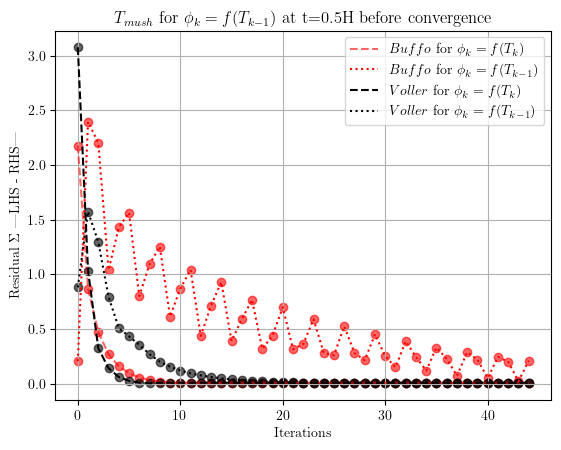

In [9]:
iter_arr = np.arange(0, len(buffo_res_pt2), 1)
max_array_length = len(buffo_res_pt2)
step_arr = np.ones(max_array_length) * 0.01
buffo_res_pt1 = np.append(buffo_res_pt1, step_arr[len(buffo_res_pt1) :])
voller_res_1p4_pt1 = np.append(voller_res_1p4_pt1, step_arr[len(voller_res_1p4_pt1) :])
voller_res_0p4_pt2 = np.append(voller_res_0p4_pt2, step_arr[len(voller_res_0p4_pt2) :])



plt.plot(
    buffo_res_pt1,
    "--",
    label=r"$Buffo$ for $\phi_k = f(T_{k})$",
    color="red",
    alpha=0.6,
)
plt.scatter(
    iter_arr,
    buffo_res_pt1,
    color="red",
    alpha=0.6,
)
plt.plot(
    buffo_res_pt2,
    ":",
    label=r"$Buffo$ for $\phi_k = f(T_{k-1})$",
    color="red",
)
plt.scatter(
    iter_arr,
    buffo_res_pt2,
    color="red",
    alpha=0.6,
)
plt.plot(
    voller_res_1p4_pt1,
    "--",
    label=r"$Voller$ for $\phi_k = f(T_{k})$",
    color="black",
)
plt.scatter(
    iter_arr,
    voller_res_1p4_pt1,
    color="black",
    alpha=0.6,
)
plt.plot(
    voller_res_0p4_pt2,
    ":",
    label=r"$Voller$ for $\phi_k = f(T_{k-1}) $",
    color="black",
)
plt.scatter(
    iter_arr,
    voller_res_0p4_pt2,
    color="black",
    alpha=0.6,
)
plt.xlabel(r"Iterations")
plt.ylabel(r"Residual $\Sigma$ |LHS - RHS|")
plt.title(r"$T_{mush}$ for $\phi_k = f(T_{k-1})$ at t=0.5H before convergence ")
plt.legend()
plt.grid()
plt.savefig("Residuals_dz0p01_time0p5h_nb.pdf", backend="pgf")
plt.show()
plt.close()

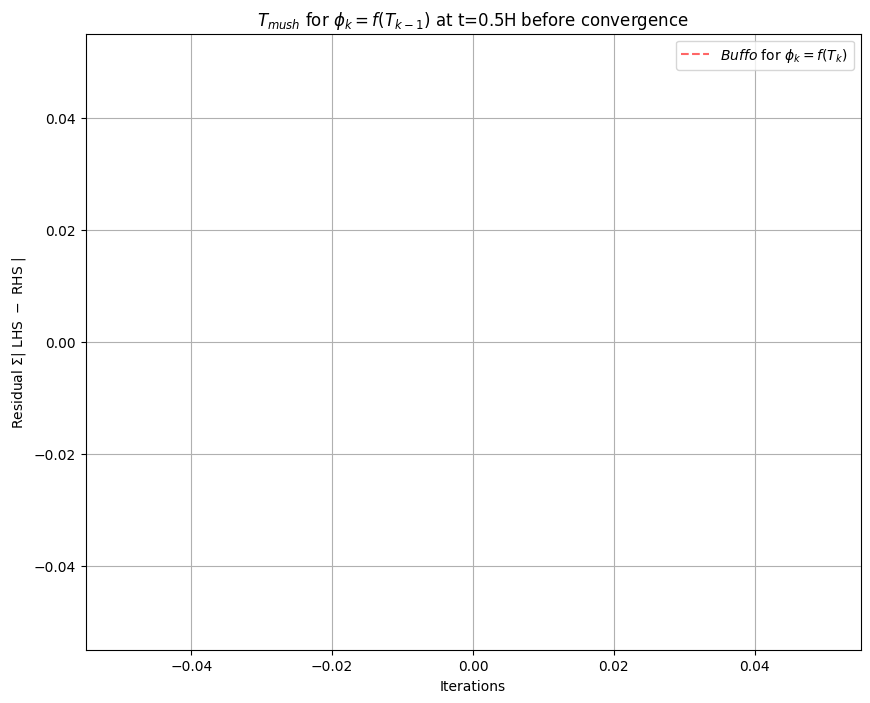

In [8]:
buffo_res_latest = np.load(
    "outputs/2024-11-06/180921_real_47.0_1000_0.01/Temperature_S34_Dirichlet_0.01_47.0_1000_nonconst_dens-mushfix/residuals.npy",
    allow_pickle=True,
)

iter_arr = np.arange(0, len(buffo_res_latest), 1)
max_array_length = len(buffo_res_latest)
step_arr = np.ones(max_array_length) * 0.01
buffo_res_pt1 = np.append(buffo_res_latest, step_arr[len(buffo_res_latest) :])

plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(
    buffo_res_pt1,
    "--",
    label=r"$Buffo \text{ for } \phi_k = f(T_{k})$",
    color="red",
    alpha=0.6,
)

plt.xlabel(r"Iterations")
plt.ylabel(r"$\text{Residual } \Sigma | \text{ LHS } - \text{ RHS } |$")
plt.title(r"$T_{mush} \text{ for } \phi_k = f(T_{k-1})$ at t=0.5H before convergence ")
plt.legend()
# plt.savefig("Residuals_dz0p01_time0p5h.png")
plt.show()
plt.close()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Restarted spyice (Python 3.12.6)

In [7]:
t_s_data = np.load(
    "outputs/2024-09-28/155301_real_47.0_1000_0.01/temperature_mushy.npy",
    allow_pickle=True,
)[1]

In [8]:
t_s_data

[[np.float64(265.0), np.float64(265.0), np.float64(271.189559549752)],
 [np.float64(265.0), np.float64(265.0), np.float64(271.189559549752)],
 [np.float64(265.0), np.float64(265.0), np.float64(271.189559549752)],
 [np.float64(265.0), np.float64(265.0), np.float64(271.189559549752)],
 [np.float64(265.0), np.float64(265.0), np.float64(271.189559549752)],
 [np.float64(265.0), np.float64(265.0), np.float64(271.189559549752)]]

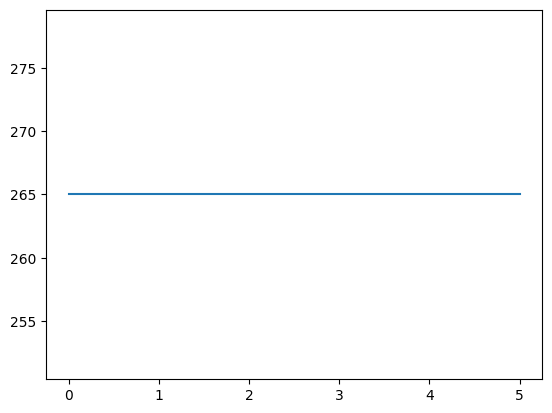

In [9]:
plt.plot(np.array(t_s_data)[:, 1])

In [10]:
# %matplotlib inline
# import matplotlib.pyplot as plt

# plt.rcParams["svg.fonttype"] = "none"
# # plt.rcParams["text.usetex"] = True

import numpy as np

In [11]:
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt

%matplotlib inline


In [12]:
# %config InlineBackend.figure_formats = ['svg']

# import matplotlib_inline

# %matplotlib inline
# matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
# import matplotlib.pyplot as plt

In [13]:
s_mush_0 = np.load(
    "outputs/2024-09-29/104732_real_47.0_25000_0.01_S0/salinity_mushy.npy",
    allow_pickle=True,
)

s_mush_2 = np.load(
    "outputs/2024-09-29/124401_real_47.0_1000_0.01_S2_notconv_recorded_results/Temperature_S2_Dirichlet_0.01_47.0_1000_nonconst_dens-mushfix/salinity_mushy.npy",
    allow_pickle=True,
)
temp_mush_2 = np.load(
    "outputs/2024-09-29/124401_real_47.0_1000_0.01_S2_notconv_recorded_results/Temperature_S2_Dirichlet_0.01_47.0_1000_nonconst_dens-mushfix/temperature_mushy.npy",
    allow_pickle=True,
)
res_mush_2 = np.load(
    "outputs/2024-09-29/124401_real_47.0_1000_0.01_S2_notconv_recorded_results/Temperature_S2_Dirichlet_0.01_47.0_1000_nonconst_dens-mushfix/residuals.npy",
    allow_pickle=True,
)

In [14]:
t_mush_10 = np.load(
    "outputs/2024-09-29/125054_real_47.0_2000_0.01_S10_notconv_recorded_results/Temperature_S10_Dirichlet_0.01_47.0_2000_nonconst_dens-mushfix/temperature_mushy.npy",
    allow_pickle=True,
)
s_mush_10 = np.load(
    "outputs/2024-09-29/125054_real_47.0_2000_0.01_S10_notconv_recorded_results/Temperature_S10_Dirichlet_0.01_47.0_2000_nonconst_dens-mushfix/salinity_mushy.npy",
    allow_pickle=True,
)
res_mush_10 = np.load(
    "outputs/2024-09-29/125054_real_47.0_2000_0.01_S10_notconv_recorded_results/Temperature_S10_Dirichlet_0.01_47.0_2000_nonconst_dens-mushfix/residuals.npy",
    allow_pickle=True,
)

In [15]:
t_mush_100 = np.load(
    "outputs/2024-09-29/112711_real_47.0_25000_0.01_S100_conv/temperature_mushy.npy",
    allow_pickle=True,
)
s_mush_100 = np.load(
    "outputs/2024-09-29/112711_real_47.0_25000_0.01_S100_conv/salinity_mushy.npy",
    allow_pickle=True,
)
res_mush_100 = np.load(
    "outputs/2024-09-29/112711_real_47.0_25000_0.01_S100_conv/residuals.npy",
    allow_pickle=True,
)


In [16]:
t_mush_270 = np.load(
    "outputs/2024-09-29/113455_real_47.0_25000_0.01/temperature_mushy.npy",
    allow_pickle=True,
)
s_mush_270 = np.load(
    "outputs/2024-09-29/113455_real_47.0_25000_0.01/salinity_mushy.npy",
    allow_pickle=True,
)
res_mush_270 = np.load(
    "outputs/2024-09-29/113455_real_47.0_25000_0.01/residuals.npy",
    allow_pickle=True,
)

In [17]:
t_mush_34 = np.load(
    "outputs/2024-09-30/112420_real_47.0_25000_0.01/temperature_mushy.npy",
    allow_pickle=True,
)
s_mush_34 = np.load(
    "outputs/2024-09-30/112420_real_47.0_25000_0.01/salinity_mushy.npy",
    allow_pickle=True,
)
res_mush_34 = np.load(
    "outputs/2024-09-30/112420_real_47.0_25000_0.01/residuals.npy", allow_pickle=True
)


In [18]:
def find_temp_melt(t_mush, s_mush, res_mush):
    s_mush = np.array(s_mush[-1])[:, 1]
    t_mush = np.array(t_mush[-1])[:, 1]
    res_mush = np.array(res_mush[-1])
    t_melt = -(9.1969758 * (1e-05) * s_mush**2) - 0.03942059 * s_mush + 272.63617665
    t_melt_mush_diff = np.abs(t_mush - t_melt)

    return t_melt, t_mush, t_melt_mush_diff, res_mush

In [19]:
t_melt_2_arr, t_mush_2_arr, t_melt_mush_diff_2, res_mush_2_arr = find_temp_melt(
    temp_mush_2, s_mush_2, res_mush_2
)
t_melt_10_arr, t_mush_10_arr, t_melt_mush_diff_10, res_mush_10_arr = find_temp_melt(
    t_mush_10, s_mush_10, res_mush_10
)
t_melt_100_arr, t_mush_100_arr, t_melt_mush_diff_100, res_mush_100_arr = find_temp_melt(
    t_mush_100, s_mush_100, res_mush_100
)
t_melt_270_arr, t_mush_270_arr, t_melt_mush_diff_270, res_mush_270_arr = find_temp_melt(
    t_mush_270, s_mush_270, res_mush_270
)
t_melt_34_arr, t_mush_34_arr, t_melt_mush_diff_34, res_mush_34_arr = find_temp_melt(
    t_mush_34, s_mush_34, res_mush_34
)


In [20]:
max_array_length = len(t_melt_mush_diff_10)
step_arr = np.ones(max_array_length)

In [21]:
def extend_array(param_arr):
    return np.append(param_arr, step_arr[len(param_arr) :] * param_arr[-1])

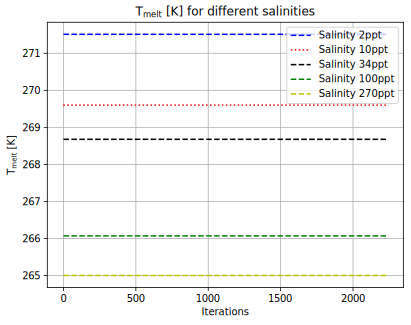

In [22]:
iter_arr = np.arange(0, len(t_melt_mush_diff_10), 1)
# t_melt_mush_diff_2 = extend_array(t_melt_mush_diff_2)
# t_melt_mush_diff_10 = extend_array(t_melt_mush_diff_10)
# t_melt_mush_diff_34 = extend_array(t_melt_mush_diff_34)
# t_melt_mush_diff_100 = extend_array(t_melt_mush_diff_100)
# t_melt_mush_diff_270 = extend_array(t_melt_mush_diff_270)

t_melt_2_arr = extend_array(t_melt_2_arr)
t_melt_10_arr = extend_array(t_melt_10_arr)
t_melt_34_arr = extend_array(t_melt_34_arr)
t_melt_100_arr = extend_array(t_melt_100_arr)
t_melt_270_arr = extend_array(t_melt_270_arr)

plt.grid()
# plt.plot(t_melt_mush_diff_2, "b--", label=r"$\text{Salinity 2ppt}$")
# plt.plot(t_melt_mush_diff_10, "r:", label=r"$\text{Salinity 10ppt}$")
# plt.plot(t_melt_mush_diff_34, "k--", label=r"$\text{Salinity 34ppt}$")
# plt.plot(t_melt_mush_diff_100, "g--", label=r"$\text{Salinity 100ppt}$")
# plt.plot(t_melt_mush_diff_270, "y--", label=r"$\text{Salinity 270ppt}$")
plt.plot(t_melt_2_arr, "b--", label=r"$\text{Salinity 2ppt}$")
plt.plot(t_melt_10_arr, "r:", label=r"$\text{Salinity 10ppt}$")
plt.plot(t_melt_34_arr, "k--", label=r"$\text{Salinity 34ppt}$")
plt.plot(t_melt_100_arr, "g--", label=r"$\text{Salinity 100ppt}$")
plt.plot(t_melt_270_arr, "y--", label=r"$\text{Salinity 270ppt}$")
plt.plot()
plt.xlabel(r"$\text{Iterations}$")
# plt.ylabel(r"|$T_{mush} - T_{melt}$ |")
# plt.title(r"$T_{mush} - T_{melt} \text{ for different salinities}$")
plt.ylabel(r"$T_{melt}$ [K]")
plt.title(r"$T_{melt} \text{ [K] for different salinities}$")
# plt.yscale("log")
# plt.xscale("log")
plt.legend()
plt.savefig("Temp_melt_mush_all_salinities.png")
plt.show()
plt.close()

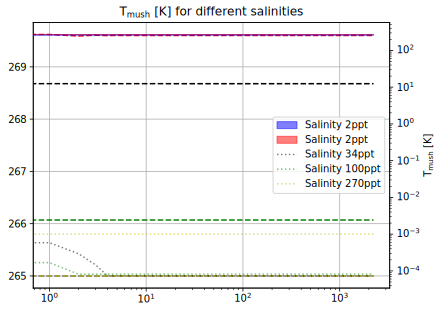

In [23]:
iter_arr = np.arange(0, len(t_melt_mush_diff_10), 1)

t_mush_2_arr = extend_array(t_mush_2_arr)
t_mush_10_arr = extend_array(t_mush_10_arr)
t_mush_34_arr = extend_array(t_mush_34_arr)
t_mush_100_arr = extend_array(t_mush_100_arr)
t_mush_270_arr = extend_array(t_mush_270_arr)
t_melt_mush_diff_2 = extend_array(t_melt_mush_diff_2)
t_melt_mush_diff_10 = extend_array(t_melt_mush_diff_10)
t_melt_mush_diff_34 = extend_array(t_melt_mush_diff_34)
t_melt_mush_diff_100 = extend_array(t_melt_mush_diff_100)
t_melt_mush_diff_270 = extend_array(t_melt_mush_diff_270)

fig, ax = plt.subplots()
ax.grid()
ax.plot(t_mush_2_arr, "b--", label=r"$\text{Salinity 2ppt}$")
ax.plot(t_mush_10_arr, "r--", label=r"$\text{Salinity 10ppt}$")
ax.plot(t_mush_34_arr, "k--", label=r"$\text{Salinity 34ppt}$")
ax.plot(t_mush_100_arr, "g--", label=r"$\text{Salinity 100ppt}$")
ax.plot(t_mush_270_arr, "y--", label=r"$\text{Salinity 270ppt}$")
ax2 = ax.twinx()
ax2.fill_between(
    iter_arr,
    extend_array(t_mush_2_arr - t_melt_mush_diff_2),
    extend_array(t_mush_2_arr + t_melt_mush_diff_2),
    alpha=0.5,
    color="blue",
    label=r"$\text{Salinity 2ppt}$",
)
# ax2.plot(t_melt_mush_diff_10, "r:", alpha=0.5, label=r"$\text{Salinity 10ppt}$")
ax2.fill_between(
    iter_arr,
    extend_array(t_mush_10_arr - t_melt_mush_diff_10),
    extend_array(t_mush_10_arr + t_melt_mush_diff_10),
    alpha=0.5,
    color="red",
    label=r"$\text{Salinity 2ppt}$",
)
ax2.plot(t_melt_mush_diff_34, "k:", alpha=0.5, label=r"$\text{Salinity 34ppt}$")
ax2.plot(t_melt_mush_diff_100, "g:", alpha=0.5, label=r"$\text{Salinity 100ppt}$")
ax2.plot(t_melt_mush_diff_270, "y:", alpha=0.5, label=r"$\text{Salinity 270ppt}$")
plt.xlabel(r"$\text{Iterations}$")
plt.ylabel(r"$T_{mush}$ [K]")
plt.title(r"$T_{mush} \text{ [K] for different salinities}$")
plt.legend()
plt.yscale("log")
plt.xscale("log")
# plt.savefig("Temp_mush_all_salinities.png")
plt.show()
plt.close()

In [24]:
extend_array(t_mush_2_arr - t_melt_mush_diff_2).shape

(2237,)

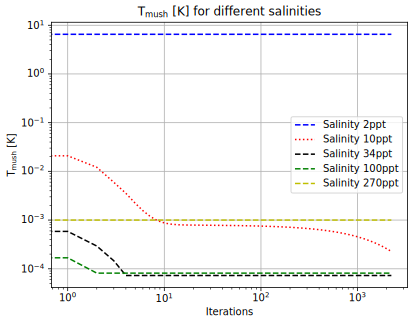

In [25]:
iter_arr = np.arange(0, len(t_melt_mush_diff_10), 1)

t_melt_mush_diff_2 = extend_array(t_melt_mush_diff_2)
t_melt_mush_diff_10 = extend_array(t_melt_mush_diff_10)
t_melt_mush_diff_34 = extend_array(t_melt_mush_diff_34)
t_melt_mush_diff_100 = extend_array(t_melt_mush_diff_100)
t_melt_mush_diff_270 = extend_array(t_melt_mush_diff_270)

plt.grid()
plt.plot(t_melt_mush_diff_2, "b--", label=r"$\text{Salinity 2ppt}$")
plt.plot(t_melt_mush_diff_10, "r:", label=r"$\text{Salinity 10ppt}$")
plt.plot(t_melt_mush_diff_34, "k--", label=r"$\text{Salinity 34ppt}$")
plt.plot(t_melt_mush_diff_100, "g--", label=r"$\text{Salinity 100ppt}$")
plt.plot(t_melt_mush_diff_270, "y--", label=r"$\text{Salinity 270ppt}$")

plt.xlabel(r"$\text{Iterations}$")
plt.ylabel(r"$T_{mush}$ [K]")
plt.title(r"$T_{mush} \text{ [K] for different salinities}$")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.savefig("Temp_mus_diff_all_salinities.png")
plt.show()
plt.close()

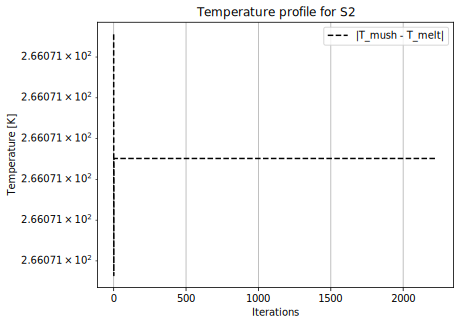

In [26]:
plt.grid()
plt.plot(np.array(t_melt_100_arr), "k--", label="|T_mush - T_melt|")
plt.xlabel("Iterations")
plt.ylabel("Temperature [K]")
plt.title("Temperature profile for S2")
plt.yscale("log")
plt.legend()
plt.show()
plt.close()